In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/emr_data.csv')

In [5]:
df.head()

,Patient ID,Age,Gender,Race,Primary Diagnosis,Secondary Diagnosis 1,Secondary Diagnosis 2,Medication,Procedure Code,Visit Date,...,Total Cost,Patient Satisfaction Score,Surgery Performed,Surgery Level,Insurance Coverage Percentage,Blood Pressure,Heart Rate,Temperature,Blood Glucose,Cholesterol
0,353d7764-2364-46e3-95af-dc55f8655820,87,Male,White,M54.5,R10.9,NaN,Fluticasone,71020,13-10-2024,...,6709.010957,5,Yes,NaN,40.222393,103/71,91,98.0,106,222
1,666c4fd7-1f2e-40c0-b9c2-3126d7e2dc91,63,Male,White,M54.5,NaN,NaN,Metformin,93000,12-05-2024,...,5245.663399,4,No,Major,56.676620,120/79,67,99.6,134,158
2,d005e886-8324-4914-8a06-ed382c058c6e,61,Male,Other,E11.9,NaN,NaN,Metformin,99214,06-08-2024,...,4176.932553,2,Yes,Minimal,68.859316,127/77,79,98.5,88,192
3,d0c95952-61f6-4969-982c-f6030240335b,63,Male,Asian,J06.9,E11.9,NaN,Amlodipine,73630,03-06-2024,...,5074.307413,5,No,Mild,100.000000,93/70,62,98.4,92,253
4,257fc98c-5aea-47ef-ab93-3d80d2234e2f,50,Female,White,R10.9,NaN,NaN,Fluticasone,93000,19-11-2024,...,5143.343855,4,Yes,NaN,51.776883,125/56,48,98.3,105,203


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient ID                     10000 non-null  object 
 1   Age                            10000 non-null  int64  
 2   Gender                         10000 non-null  object 
 3   Race                           10000 non-null  object 
 4   Primary Diagnosis              10000 non-null  object 
 5   Secondary Diagnosis 1          2999 non-null   object 
 6   Secondary Diagnosis 2          1535 non-null   object 
 7   Medication                     10000 non-null  object 
 8   Procedure Code                 10000 non-null  int64  
 9   Visit Date                     10000 non-null  object 
 10  Discharge Date                 5000 non-null   object 
 11  Length of Stay                 10000 non-null  int64  
 12  Insurance Type                 10000 non-null  

,Age,Procedure Code,Length of Stay,Readmission,Total Cost,Patient Satisfaction Score,Insurance Coverage Percentage,Heart Rate,Temperature,Blood Glucose,Cholesterol
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.584700,76262.727700,2.495300,0.199300,7985.008211,3.956300,69.747778,69.489000,98.605840,99.283400,199.815900
std,19.594709,27163.215062,2.959367,0.399494,2939.867417,1.131423,14.695487,10.068447,0.705877,19.940819,40.543779
min,0.000000,20610.000000,0.000000,0.000000,500.000000,1.000000,9.483494,25.000000,96.000000,19.000000,50.000000
25%,36.000000,71020.000000,0.000000,0.000000,5960.028719,4.000000,59.631445,63.000000,98.100000,86.000000,172.000000
50%,49.000000,73630.000000,2.000000,0.000000,7987.873709,4.000000,69.590414,70.000000,98.600000,99.000000,200.000000
75%,63.000000,99213.000000,4.000000,0.000000,10027.674620,5.000000,80.102975,76.000000,99.100000,113.000000,227.000000
max,100.000000,99214.000000,28.000000,1.000000,15000.000000,5.000000,100.000000,103.000000,101.200000,177.000000,368.000000


## **Checking for missing values**

In [7]:
print(df.isnull().sum())

Patient ID                          0
Age                                 0
Gender                              0
Race                                0
Primary Diagnosis                   0
Secondary Diagnosis 1            7001
Secondary Diagnosis 2            8465
Medication                          0
Procedure Code                      0
Visit Date                          0
Discharge Date                   5000
Length of Stay                      0
Insurance Type                      0
Physician ID                        0
Hospital Department                 0
Source System                       0
Readmission                         0
Total Cost                          0
Patient Satisfaction Score          0
Surgery Performed                   0
Surgery Level                    6232
Insurance Coverage Percentage       0
Blood Pressure                      0
Heart Rate                          0
Temperature                         0
Blood Glucose                       0
Cholesterol 

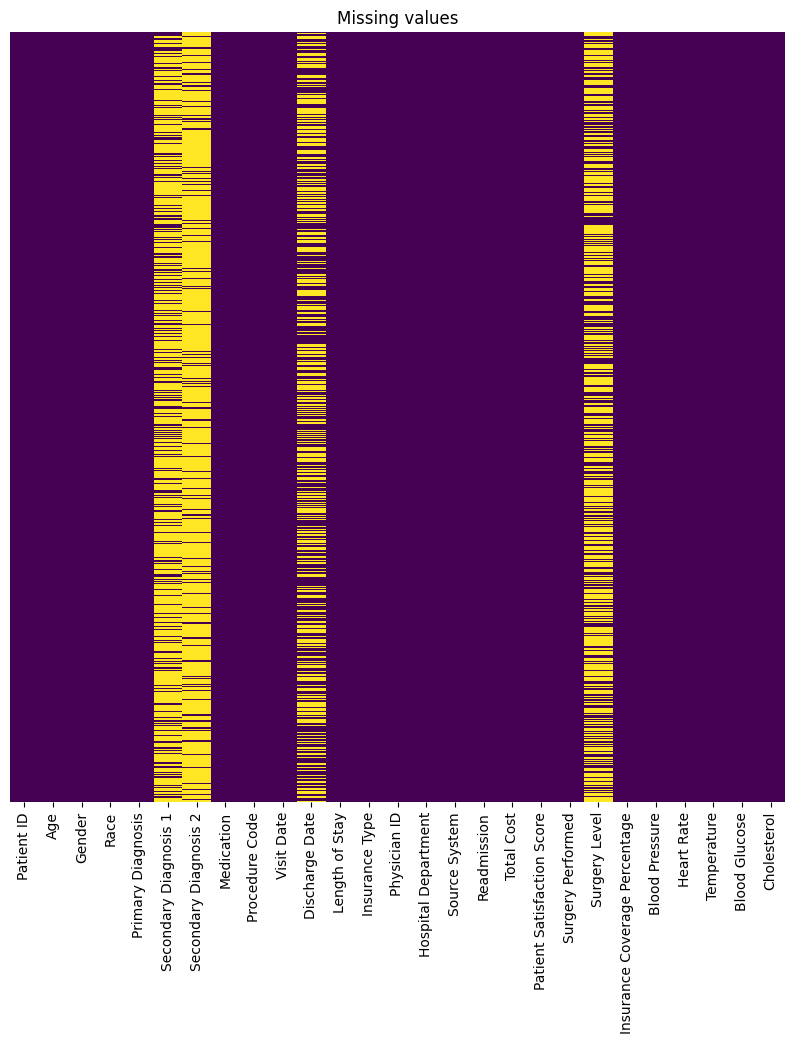

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')
plt.title('Missing values')
plt.show()

**Checking for duplicates**

In [14]:
print(df.duplicated().sum())

0


In [15]:
# remove duplcates if any
df = df.drop_duplicates()

 **Now exploring for numericaal data**

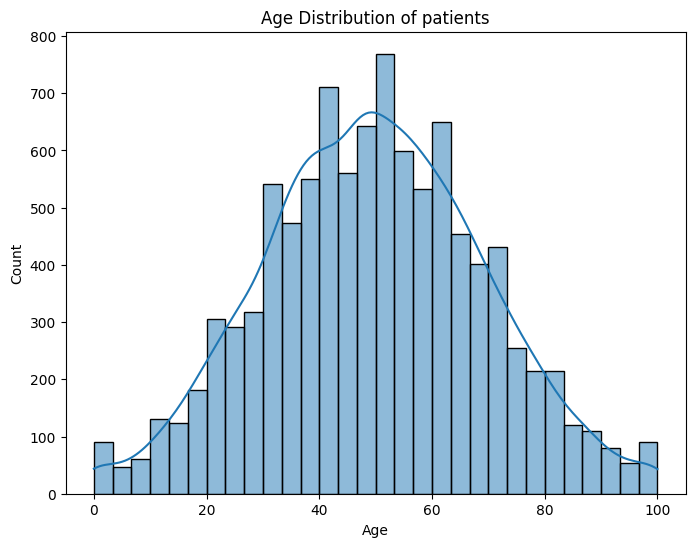

In [16]:
#  For Age Distribution Of Patients

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of patients')
plt.show()

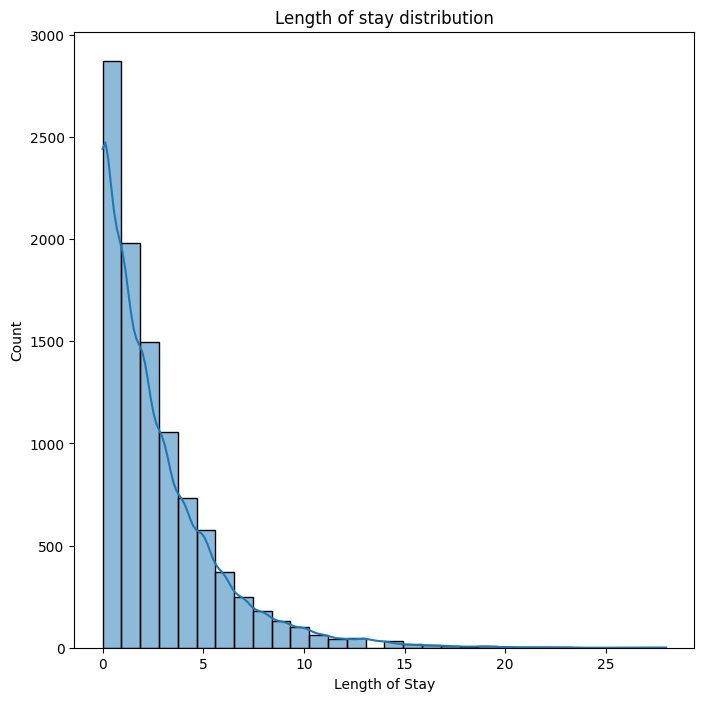

In [17]:
#  For length of stay distribution

plt.figure(figsize = (8 , 8))
sns.histplot(df['Length of Stay'].dropna() , bins = 30 , kde = True)
plt.title('Length of stay distribution')
plt.show()

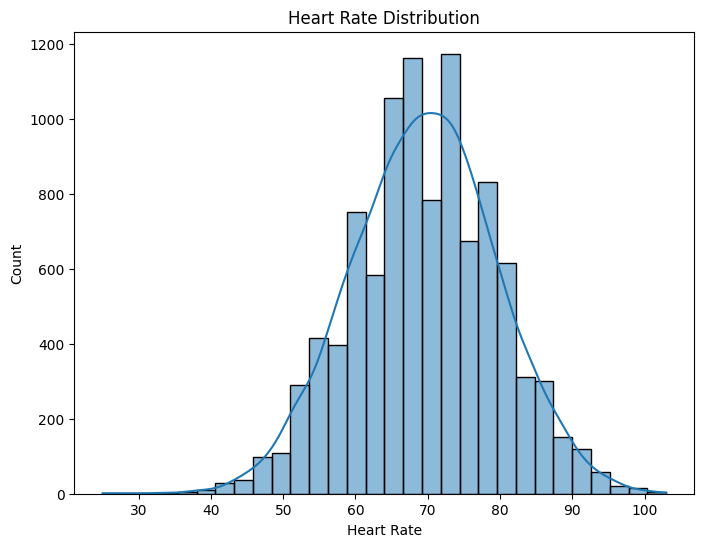

In [18]:
# Heart Rate Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Heart Rate'].dropna(), bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.show()

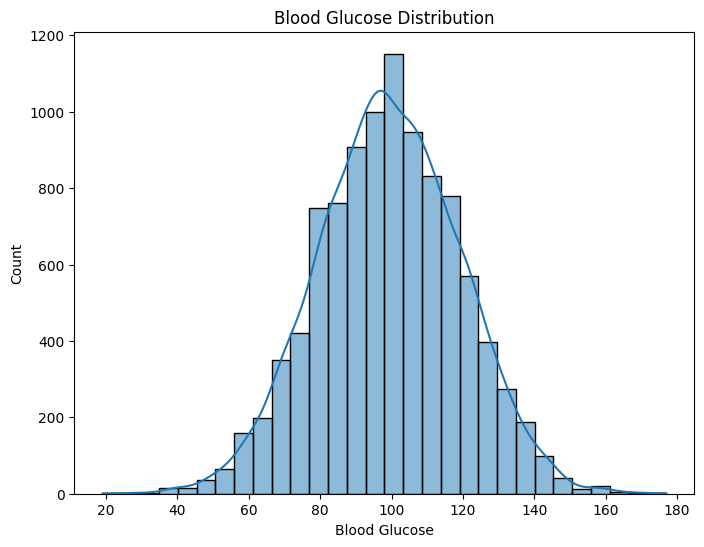

In [19]:
# Blood Glucose Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Blood Glucose'].dropna(), bins=30, kde=True)
plt.title('Blood Glucose Distribution')
plt.show()

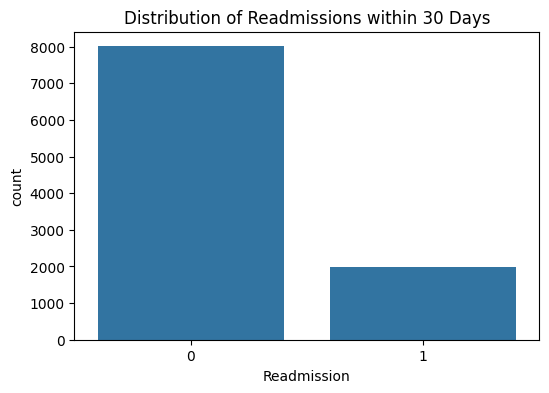

In [20]:
# Visualize readmissions
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Readmission')
plt.title('Distribution of Readmissions within 30 Days')
plt.show()

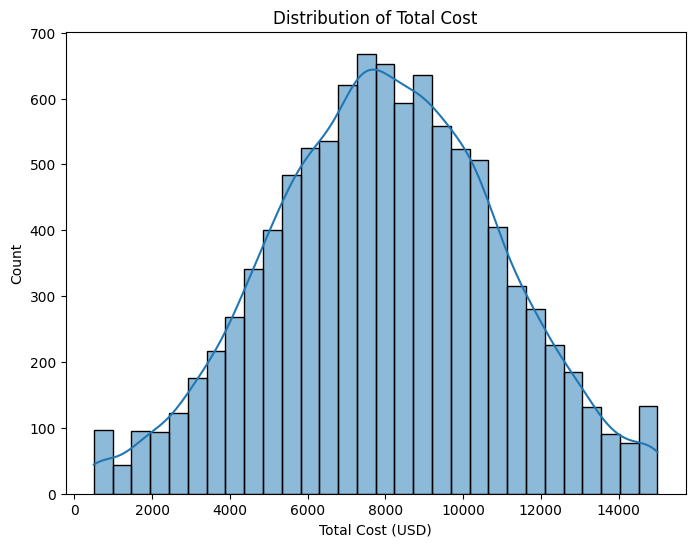

In [21]:
# Visualize TotalCost distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Cost'], bins=30, kde=True)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost (USD)')
plt.show()

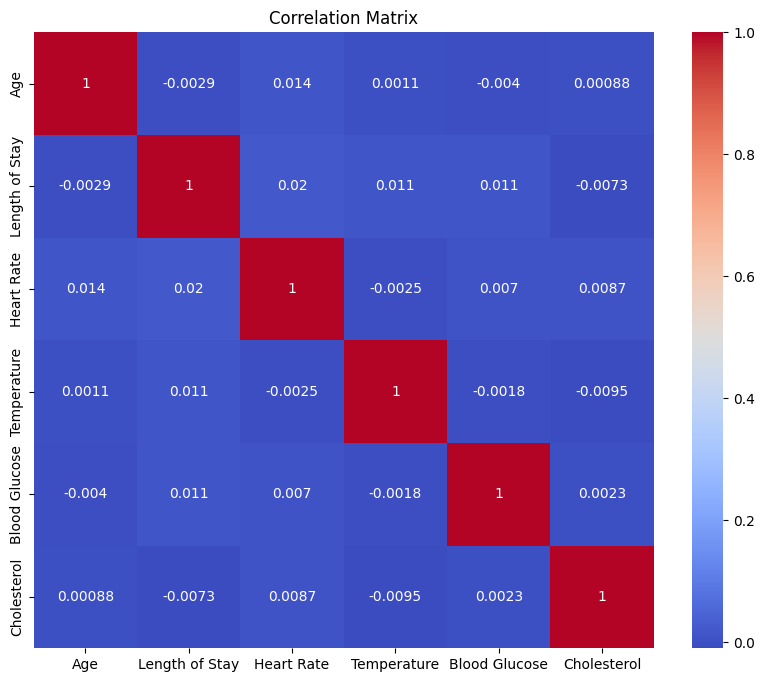

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Length of Stay', 'Heart Rate', 'Temperature', 'Blood Glucose', 'Cholesterol']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Exploring categorical features**

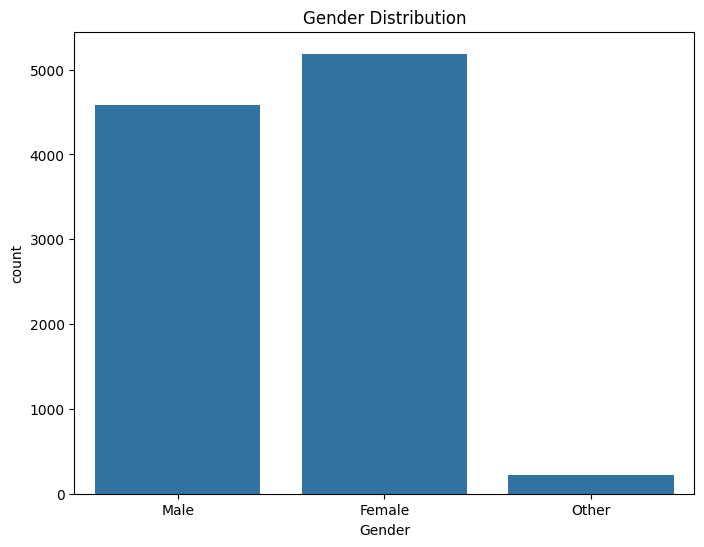

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

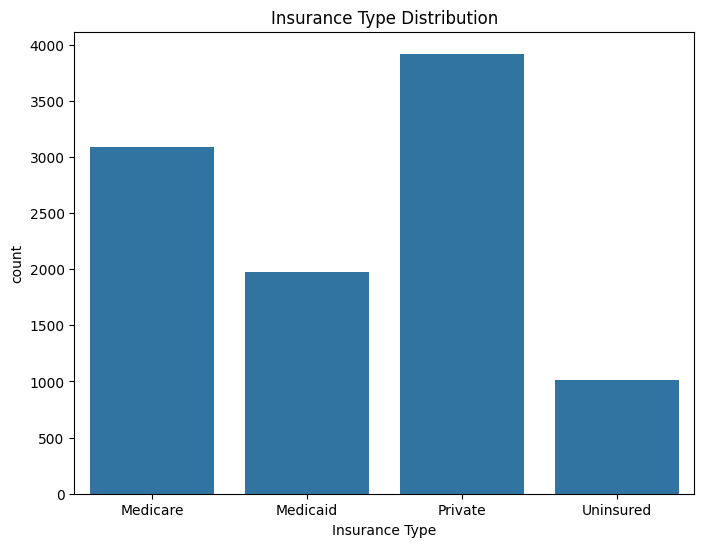

In [24]:
# Insurance Type Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance Type', data=df)
plt.title('Insurance Type Distribution')
plt.show()

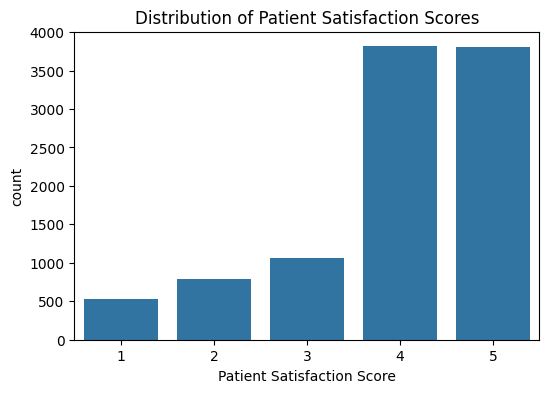

In [25]:
# Visualize PatientSatisfactionScore
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Patient Satisfaction Score')
plt.title('Distribution of Patient Satisfaction Scores')
plt.show()

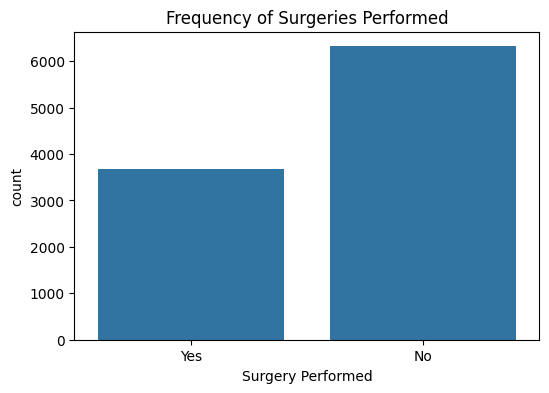

In [26]:
# Visualize SurgeryPerformed
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Surgery Performed')
plt.title('Frequency of Surgeries Performed')
plt.show()

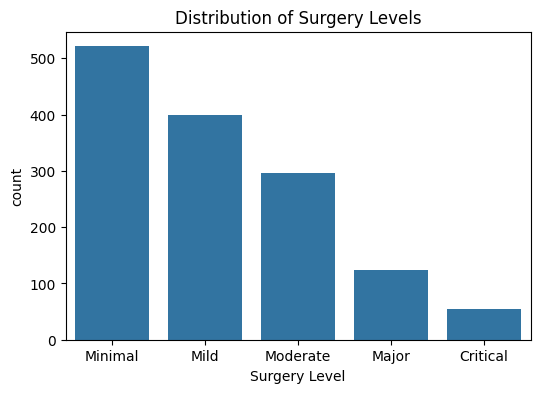

In [27]:
# Visualize SurgeryLevel
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Surgery Performed'] == 'Yes'], x='Surgery Level')
plt.title('Distribution of Surgery Levels')
plt.show()

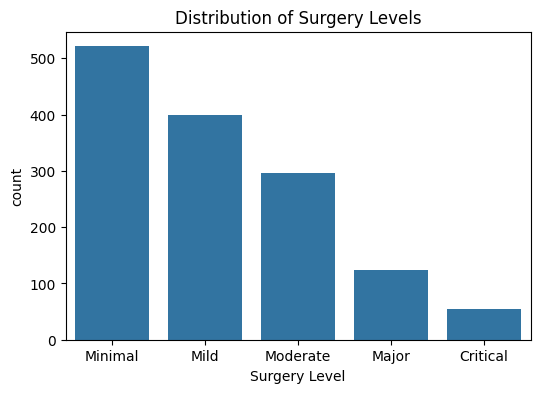

In [28]:
# Visualize SurgeryLevel
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Surgery Performed'] == 'Yes'], x='Surgery Level')
plt.title('Distribution of Surgery Levels')
plt.show()

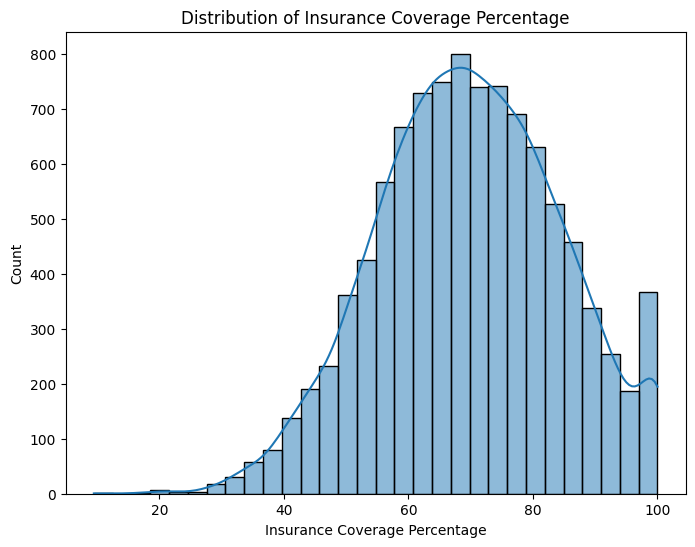

In [29]:
# Visualize InsuranceCoveragePercentage
plt.figure(figsize=(8, 6))
sns.histplot(df['Insurance Coverage Percentage'], bins=30, kde=True)
plt.title('Distribution of Insurance Coverage Percentage')
plt.xlabel('Insurance Coverage Percentage')
plt.show()

In [30]:
# Analyzing typos or inconsistencies in categorical data.
print("\nUnique values in 'Gender' column:")
print(df['Gender'].unique())

print("\nUnique values in 'Race' column:")
print(df['Race'].unique())


Unique values in 'Gender' column:
['Male' 'Female' 'Other']

Unique values in 'Race' column:
['White' 'Other' 'Asian' 'Black or African American' 'Hispanic or Latino']


In [38]:
df['Visit Date'] = pd.to_datetime(df['Visit Date'], format='%d-%m-%Y', errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y', errors='coerce')

# Extract year and month
df['Visit YearMonth'] = df['Visit Date'].dt.to_period('M')
df['Discharge YearMonth'] = df['Discharge Date'].dt.to_period('M')

display(df[['Visit Date', 'Discharge Date', 'Visit YearMonth', 'Discharge YearMonth']].head())

,Visit Date,Discharge Date,Visit YearMonth,Discharge YearMonth
0,2024-10-13,NaT,2024-10,NaT
1,2024-05-12,2024-08-28,2024-05,2024-08
2,2024-08-06,NaT,2024-08,NaT
3,2024-06-03,NaT,2024-06,NaT
4,2024-11-19,2023-12-12,2024-11,2023-12
